In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics 
import itertools

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [3]:
filepath = "C://Users//Angel//Hazardous_Asteroid_Prediction//input"
df = pd.read_csv(filepath+'//dataset.csv')
df.head(5)

C:\Users\Angel\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,equinox,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.4000,939.4000,0.0900,0.2000,JPL 47,2458600.5000,58600,20190427.0000,J2000,0.0760,2.7692,2.5587,10.5941,80.3055,73.5977,77.3721,2.9796,0.2139,2458238.7541,20180430.2541,1683.1457,4.6082,1.5948,620.6405,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,MBA,0.4330
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.2000,545.0000,0.1010,18.0000,JPL 37,2459000.5000,59000,20200531.0000,J2000,0.2300,2.7738,2.1359,34.8329,173.0247,310.2024,144.9757,3.4117,0.2133,2458320.9624,20180721.4624,1687.4110,4.6199,1.2343,480.3486,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,MBA,0.3594
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.3300,246.5960,0.2140,10.5940,JPL 112,2459000.5000,59000,20200531.0000,J2000,0.2569,2.6683,1.9827,12.9910,169.8515,248.0662,125.4354,3.3539,0.2261,2458445.7922,20181123.2922,1592.0138,4.3587,1.0343,402.5146,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,MBA,0.3385
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.0000,525.4000,0.4228,0.2000,JPL 35,2458600.5000,58600,20190427.0000,J2000,0.0887,2.3614,2.1519,7.1418,103.8108,150.7285,95.8619,2.5709,0.2716,2458247.5596,20180509.0596,1325.4328,3.6288,1.1395,443.4514,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,MBA,0.3998
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.9000,106.6990,0.2740,3.1400,JPL 114,2459000.5000,59000,20200531.0000,J2000,0.1909,2.5740,2.0826,5.3674,141.5710,358.6484,17.8463,3.0655,0.2387,2458925.7231,20200317.2231,1508.4144,4.1298,1.0958,426.4330,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,MBA,0.5219


In [4]:
df.shape

(958524, 45)

In [5]:
df.columns

Index(['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'H',
       'diameter', 'albedo', 'diameter_sigma', 'orbit_id', 'epoch',
       'epoch_mjd', 'epoch_cal', 'equinox', 'e', 'a', 'q', 'i', 'om', 'w',
       'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld',
       'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w',
       'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'class',
       'rms'],
      dtype='object')

In [6]:
df.describe()

,spkid,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,958524.0000,952261.0000,136209.0000,135103.0000,136081.0000,958524.0000,958524.0000,958524.0000,958524.0000,958524.0000,958524.0000,958524.0000,958524.0000,958524.0000,958523.0000,958520.0000,958524.0000,958524.0000,958524.0000,958520.0000,958523.0000,938603.0000,958397.0000,938602.0000,938602.0000,938602.0000,938602.0000,938602.0000,938602.0000,938602.0000,938598.0000,938602.0000,938602.0000,938598.0000,958522.0000
mean,3810113.9886,16.9064,5.5064,0.1306,0.4792,2458869.2820,58868.7820,20196925.0516,0.1561,2.9021,2.3949,9.0549,168.4564,181.3695,177.3526,3.4558,0.2367,2458856.2367,20195807.5415,5085.3442,13.9229,1.4152,539.3642,0.7263,15.4142,19.8293,1.1684,5.3102,1370061.6389,1369977.2267,21.3145,0.0506,431278021.0009,85258.1498,0.5612
std,6831540.8805,1.7904,9.4252,0.1103,0.7829,701.6716,701.6716,19303.5368,0.0926,39.7195,2.1392,6.6377,102.8817,103.8880,105.8168,71.7694,0.0794,1580.5062,43376.6856,2308961.0057,6321.5808,2.1567,834.3070,93.3639,4392.3807,2903.7853,128.2231,1333.3812,915899566.2384,915899068.4014,7197.0340,9.8150,295304579371.8069,27676810.5905,2.7457
min,2000001.0000,-1.1000,0.0025,0.0010,0.0005,2425051.5000,25051.0000,19270620.0000,0.0000,-14702.4479,0.0705,0.0077,0.0000,0.0001,-70.7037,0.6538,0.0000,2283183.4055,15390106.9055,151.1918,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,2239631.7500,16.1000,2.7800,0.0530,0.1800,2459000.5000,59000.0000,20200531.0000,0.0922,2.3878,1.9714,4.1654,80.6044,91.4821,83.7850,2.7816,0.1895,2458560.3223,20190317.8223,1347.7380,3.6899,0.9797,375.3949,0.0000,0.0000,0.0000,0.0000,0.0000,0.0001,0.0000,0.0000,0.0000,0.0001,0.0000,0.5180
50%,2479262.5000,16.9000,3.9720,0.0790,0.3320,2459000.5000,59000.0000,20200531.0000,0.1450,2.6470,2.2258,7.4157,159.8269,182.3581,175.6411,3.0470,0.2289,2458944.5914,20200405.0914,1572.9756,4.3066,1.2409,477.7062,0.0000,0.0000,0.0000,0.0000,0.0001,0.0001,0.0000,0.0000,0.0000,0.0002,0.0000,0.5663
75%,3752517.7500,17.7140,5.7650,0.1900,0.6200,2459000.5000,59000.0000,20200531.0000,0.2007,3.0019,2.5783,12.4076,252.2478,271.5216,269.8657,3.3648,0.2671,2459361.2851,20210526.7851,1899.7650,5.2013,1.5934,617.3248,0.0000,0.0000,0.0000,0.0000,0.0002,0.0003,0.0002,0.0000,0.0000,0.0008,0.0001,0.6139
max,54017232.0000,33.2000,939.4000,1.0000,140.0000,2459000.5000,59000.0000,20200531.0000,1.8554,33488.8960,80.3988,175.0829,359.9998,359.9996,491.6180,66972.7961,2.3811,2546362.2932,22590808.7932,2238461721.1518,6128574.1852,79.4766,30929.9084,39425.0000,3241200.0000,1015000.0000,55330.0000,1199100.0000,884510000000.0000,884510000000.0000,5509700.0000,7698.8000,285310000000000.0000,19107000000.0000,2686.6000


In [7]:
# Potentially hazardous asteroids
df['pha'].value_counts(normalize=True)

N   0.9978
Y   0.0022
Name: pha, dtype: float64

In [8]:
# Near Earth Object
df['neo'].value_counts(normalize=True)

N   0.9761
Y   0.0239
Name: neo, dtype: float64

In [9]:
# function for performing a summarising, preliminary EDA
def initial_eda(df):
    """ Prints the dataFrames's column names, data types, 
    number of distinct values, number of missing values
    @param df: pandas DataFrame
    """
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimensions : %d rows, %d columns" % (df.shape[0], df.shape[1]))
        print("Total NA Values : %d " % (total_na))
        print("%65s %20s   %10s %10s" % ("Column Name", "Data Type", "#Distinct", "NA Values"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%65s %20s   %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
    else:
        print("Expect a DataFrame but got a %15s" % (type(df)))

In [10]:
# performe EDA  
#initial_eda(df)

In [11]:
to_drop = ['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'orbit_id',
           'equinox', 'diameter', 'albedo', 'diameter_sigma']
df.drop(to_drop, axis=1, inplace=True)

In [12]:
df.dropna(inplace = True)

In [13]:
initial_eda(df)

Dimensions : 932335 rows, 34 columns
Total NA Values : 0 
                                                      Column Name            Data Type    #Distinct  NA Values


KeyboardInterrupt: 

In [14]:
# Potentially hazardous asteroids
df['pha'].value_counts(normalize=True)

N   0.9978
Y   0.0022
Name: pha, dtype: float64

In [15]:
df['pha'] = df['pha'].map({'Y': 1, 'N': 0})
df['neo'] = df['neo'].map({'Y': 1, 'N': 0})

In [16]:
df = pd.get_dummies(df, columns=['class'])

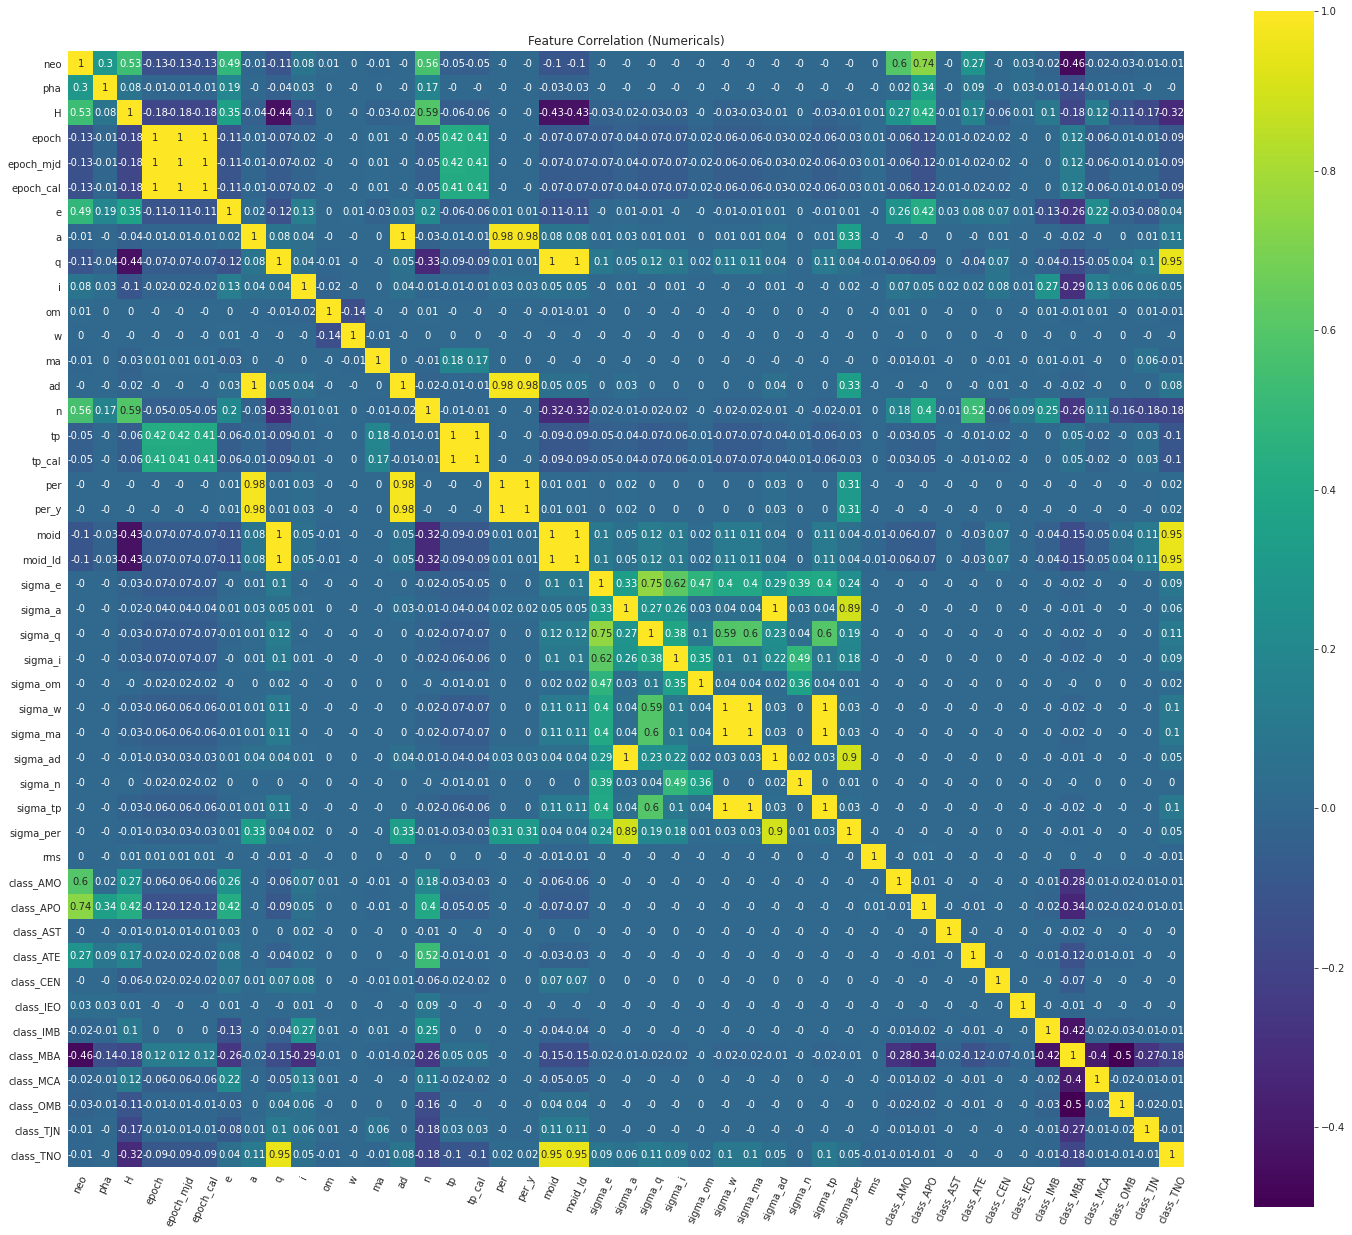

In [17]:
# plot the heatmap of numerical feature correlation
corr = df.corr() 
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(25, 22))
    ax = sns.heatmap(round(corr,2), 
                     xticklabels=corr.columns, 
                     yticklabels=corr.columns,
                     square=True, 
                     annot=True, 
                     cmap='viridis')
plt.xticks(rotation=65);
plt.title('Feature Correlation (Numericals)');

In [18]:
def corrank(X):
    """ Gets a pandas DataFrame column and prints a descending list of 
    Correlated pairs and their Correlations
    @param X: numerical pandas DataFrame
    """
    df = pd.DataFrame([[str((i,j)), X.corr().loc[i,j]] 
                       for i,j in list(itertools.combinations(X.corr(), 2))], 
                                        columns=['Pairs','Correlation'])
    df = df.sort_values(by='Correlation', ascending=False)

    # The next line is applicable if we require ONLY correlations regarding "pha"
    df = df.loc[df['Pairs'].str.contains("pha", case=True)]
    print(df)
# print a descending list of correlation pairs (Max on top)
#corrank(df) 

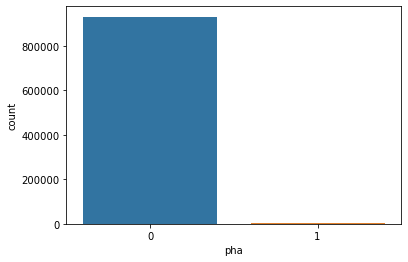

In [19]:

sns.countplot(x=df['pha'])

In [22]:
df.pha.value_counts()

0    930269
1      2066
Name: pha, dtype: int64

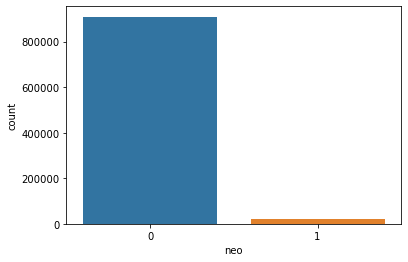

In [20]:

sns.countplot(x=df['neo'])

In [23]:
X = df.drop('pha', axis=1)
y = df['pha']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle=True,
                                                    stratify=y)

lr = LogisticRegression(max_iter=300)
lr = lr.fit(X_train, y_train)
print('Logistic Regression score for training Stratified set: %f' %
      lr.score(X_test, y_test))
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

Logistic Regression score for training Stratified set: 0.997769
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    186054
           1       0.00      0.00      0.00       413

    accuracy                           1.00    186467
   macro avg       0.50      0.50      0.50    186467
weighted avg       1.00      1.00      1.00    186467

